In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy

# Question 1

In [12]:
df = pd.read_csv('wine-full.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

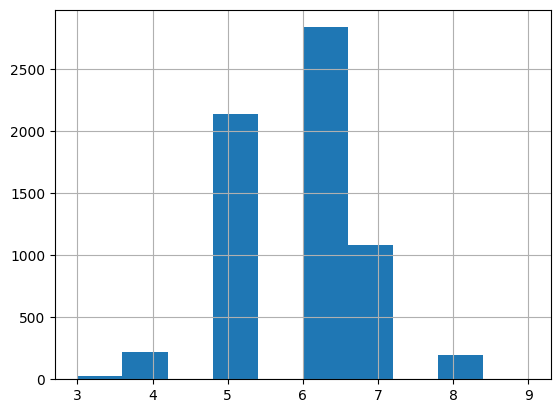

In [13]:
df['quality'].hist()

In [14]:
quality_counts = df['quality'].value_counts()
quality_counts

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [15]:
total_rows = len(df)
for quality, count in quality_counts.items():
    percentage = count / total_rows * 100
    print("Quality ", quality, " percentage of values: ", percentage, "%")

Quality  6  percentage of values:  43.650915807295675 %
Quality  5  percentage of values:  32.907495767277204 %
Quality  7  percentage of values:  16.60766507618901 %
Quality  4  percentage of values:  3.3246113590888102 %
Quality  8  percentage of values:  2.9706018162228722 %
Quality  3  percentage of values:  0.46175157765122365 %
Quality  9  percentage of values:  0.07695859627520393 %


The quality scores are not balanced.
Looking at the distribution, most wines have quality scores of 5, 6, or 7. There are very few wines with quality 3, 4, 8, or 9, for 1,2 & 10 there are none.

# Question 2

In [16]:
red_wines_df = df[df['type'] == 'red']
white_wines_df = df[df['type'] == 'white']

print("Red wines count:", len(red_wines_df))
print("White wines count:", len(white_wines_df))
print()
print("Red wine quality - Mean:", red_wines_df['quality'].mean())
print("Red wine quality - Median:", red_wines_df['quality'].median())
print()
print("White wine quality - Mean:", white_wines_df['quality'].mean())
print("White wine quality - Median:", white_wines_df['quality'].median())

Red wines count: 1599
White wines count: 4898

Red wine quality - Mean: 5.6360225140712945
Red wine quality - Median: 6.0

White wine quality - Mean: 5.87790935075541
White wine quality - Median: 6.0


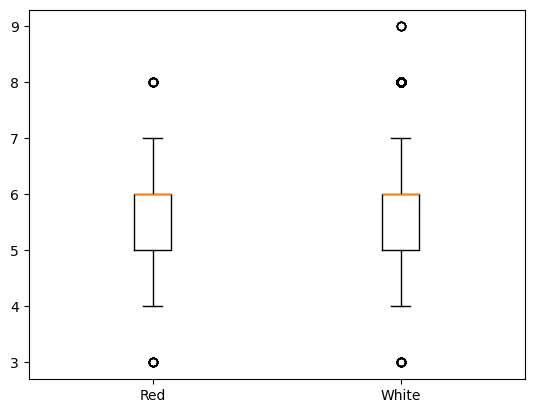

In [17]:
plt.boxplot([red_wines_df['quality'], white_wines_df['quality']], tick_labels=['Red', 'White'])
plt.show()

We will check if there is statistical significance between the quality values of red and white wines. We define alpha value as 0.05.

In [18]:
a_value = 0.05
p_value = scipy.stats.ttest_ind(red_wines_df['quality'], white_wines_df['quality']).pvalue

print("P value:", p_value)

if p_value < a_value:
    print("There is a statistically significant difference between red and white wine quality.")
else:
    print("There is no statistically significant difference between red and white wine quality.")

P value: 4.888069044201508e-22
There is a statistically significant difference between red and white wine quality.


Based on the analysis:
- White wine has a slightly higher mean quality score
- Both red and white wine have the same median quality (6.0)
- The t-test shows there is a statistically significant difference

Therefore, white wine has a marginally higher average quality than red wine in this dataset. However, the difference is very small (~0.24 points), the medians are identical, and both types have very similar quality distributions.